In [35]:
#검색
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#unicode 안깨지게 필요
import matplotlib
import warnings
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime,time,date
from pandas_datareader import data
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False
warnings.simplefilter('ignore')

In [55]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [72]:
#1

In [178]:
titanic = titanic.drop(columns=['deck']).dropna(subset=['age'])

KeyError: "['deck'] not found in axis"

In [73]:
#2

In [97]:
all = titanic['survived'].count()
all

714

In [89]:
print("생존자",titanic[titanic['survived'] == 1]['survived'].count())
print("사망자",titanic[titanic['survived'] == 0]['survived'].count())

생존자 290
사망자 424


In [74]:
#3

In [92]:
sur1 = titanic[titanic['survived'] == 1][['survived','pclass']]
sur2 = titanic[titanic['survived'] == 0][['survived','pclass']]
sur1 = sur1.groupby('pclass')
sur2 = sur2.groupby('pclass')

In [93]:
print(sur1.count())
print(sur2.count())
res = sur1.count()/(sur1.count()+sur2.count())*100
res

        survived
pclass          
1            122
2             83
3             85
        survived
pclass          
1             64
2             90
3            270


,survived
pclass,
1,65.591398
2,47.976879
3,23.943662


In [94]:
#4

In [95]:
sib1 = titanic[titanic['survived'] == 1]['sibsp'].sum()
sib2 = titanic[titanic['survived'] == 0]['sibsp'].sum()
res = (sib1)/(sib1+sib2)*100
res

39.07103825136612

In [96]:
#5

In [99]:
aln1 = titanic[titanic['sibsp']==0][titanic['parch']==0][titanic['survived'] == 1]['survived'].count()
aln2 = titanic[titanic['sibsp']==0][titanic['parch']==0][titanic['survived'] == 1]['survived'].count()
res = (aln1)/(aln1+aln2)*100
res

50.0

In [107]:
#6

In [109]:
fem1 = titanic[titanic['sex']=='female'][titanic['survived'] == 1]['survived'].count()
fem2 = titanic[titanic['sex']=='female'][titanic['survived'] == 0]['survived'].count()
res = (fem1)/(fem1+fem2)*100
print("여성생존률",res)
m1 = titanic[titanic['sex']=='male'][titanic['survived'] == 1]['survived'].count()
m2 = titanic[titanic['sex']=='male'][titanic['survived'] == 0]['survived'].count()
res = (m1)/(m1+m2)*100
print("남성생존률",res)

여성생존률 75.47892720306514
남성생존률 20.52980132450331


In [100]:
#7

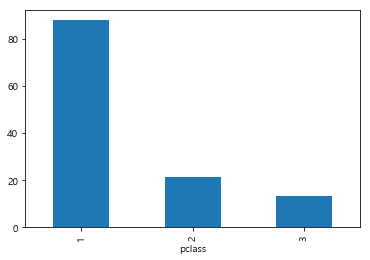

In [106]:
gb = titanic.groupby('pclass')
gb['fare'].mean().plot(kind='bar')
plt.show()

In [110]:
#8, 9

In [117]:
age = []
def classification(a) : 
    for i in a :
        if 1<=i<15:
            age.append('미성년자')
        elif 15<=i<25:
            age.append('청년')
        elif 25<=i<35:
            age.append('중년')
        elif 35<=i<60:
            age.append('장년')
        else :
            age.append('노년')

In [118]:
classification(titanic['age'])

In [119]:
titanic['나이분류'] = age
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,나이분류
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,청년
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,장년
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,중년
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,장년
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,장년
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,Southampton,no,True,장년
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,Southampton,no,False,미성년자
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,Southampton,yes,False,중년
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,Cherbourg,yes,False,미성년자
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,Southampton,yes,False,미성년자


In [170]:
#10

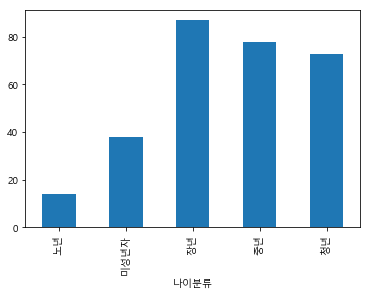

In [169]:
gb = titanic.groupby('나이분류')
gb.sum()['survived'].plot(kind='bar')
plt.show()

In [171]:
#11

In [195]:
cla1 = titanic[titanic['survived'] == 1][['survived','나이분류']]
cla2 = titanic[titanic['survived'] == 0][['survived','나이분류']]
cla1 = cla1.groupby('나이분류')
cla2 = cla2.groupby('나이분류')
res = cla1.count()/(cla1.count()+cla2.count())*100

res1 = res == res['survived'].max()
res[res1['survived'].values]

,survived
나이분류,
미성년자,53.521127


In [174]:
#12

In [177]:
titanic.index=['sex','나이분류','pclass']

ValueError: Length mismatch: Expected axis has 714 elements, new values have 3 elements